<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(_4)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-4_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,64.432938,32.011216,-0.000869,106.443285,106.443993,-0.000708
1,0.0,1.0,38.180120,73.563602,-0.000072,121.743649,121.743778,-0.000129
2,0.0,2.0,26.794069,35.536216,0.000709,72.330994,72.330220,0.000775
3,0.0,3.0,79.831426,61.789961,0.000131,151.621519,151.621308,0.000211
4,0.0,4.0,34.393191,67.801738,-0.000104,112.194826,112.194972,-0.000146
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,60.114397,58.528066,-0.000139,128.642325,128.642438,-0.000114
119996,999.0,116.0,61.185607,54.567516,-0.000193,125.752930,125.753080,-0.000151
119997,999.0,117.0,34.217027,38.190661,0.000792,82.408481,82.407728,0.000752
119998,999.0,118.0,35.818938,26.872195,0.002514,72.693647,72.691129,0.002518


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    64.432938  32.011216 -0.000869  106.443285  106.443993 -0.000708
      1.0    38.180120  73.563602 -0.000072  121.743649  121.743778 -0.000129
      2.0    26.794069  35.536216  0.000709   72.330994   72.330220  0.000775
      3.0    79.831426  61.789961  0.000131  151.621519  151.621308  0.000211
      4.0    34.393191  67.801738 -0.000104  112.194826  112.194972 -0.000146
...                ...        ...       ...         ...         ...       ...
999.0 115.0  60.114397  58.528066 -0.000139  128.642325  128.642438 -0.000114
      116.0  61.185607  54.567516 -0.000193  125.752930  125.753080 -0.000151
      117.0  34.217027  38.190661  0.000792   82.408481   82.407728  0.000752
      118.0  35.818938  26.872195  0.002514   72.693647   72.691129  0.002518
      119.0  30.006886  52.642858  0.000529   92.650274   92.649851  0.000423

[120000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    64.432938  32.011216 -0.000869  106.443285  106.443993 -0.000708
      1.0    38.180120  73.563602 -0.000072  121.743649  121.743778 -0.000129
      2.0    26.794069  35.536216  0.000709   72.330994   72.330220  0.000775
      3.0    79.831426  61.789961  0.000131  151.621519  151.621308  0.000211
      4.0    34.393191  67.801738 -0.000104  112.194826  112.194972 -0.000146
...                ...        ...       ...         ...         ...       ...
999.0 115.0  60.114397  58.528066 -0.000139  128.642325  128.642438 -0.000114
      116.0  61.185607  54.567516 -0.000193  125.752930  125.753080 -0.000151
      117.0  34.217027  38.190661  0.000792   82.408481   82.407728  0.000752
      118.0  35.818938  26.872195  0.002514   72.693647   72.691129  0.002518
      119.0  30.006886  52.642858  0.000529   92.650274   92.649851  0.000423

[120000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,64.432938,32.011216,-0.000869,106.443285,106.443993,-0.000708
1,0.0,1.0,38.180120,73.563602,-0.000072,121.743649,121.743778,-0.000129
2,0.0,2.0,26.794069,35.536216,0.000709,72.330994,72.330220,0.000775
3,0.0,3.0,79.831426,61.789961,0.000131,151.621519,151.621308,0.000211
4,0.0,4.0,34.393191,67.801738,-0.000104,112.194826,112.194972,-0.000146
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,60.114397,58.528066,-0.000139,128.642325,128.642438,-0.000114
119996,999.0,116.0,61.185607,54.567516,-0.000193,125.752930,125.753080,-0.000151
119997,999.0,117.0,34.217027,38.190661,0.000792,82.408481,82.407728,0.000752
119998,999.0,118.0,35.818938,26.872195,0.002514,72.693647,72.691129,0.002518


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    64.432938  32.011216 -0.000869  106.443285  106.443993 -0.000708
      1.0    38.180120  73.563602 -0.000072  121.743649  121.743778 -0.000129
      2.0    26.794069  35.536216  0.000709   72.330994   72.330220  0.000775
      3.0    79.831426  61.789961  0.000131  151.621519  151.621308  0.000211
      4.0    34.393191  67.801738 -0.000104  112.194826  112.194972 -0.000146
...                ...        ...       ...         ...         ...       ...
999.0 115.0  60.114397  58.528066 -0.000139  128.642325  128.642438 -0.000114
      116.0  61.185607  54.567516 -0.000193  125.752930  125.753080 -0.000151
      117.0  34.217027  38.190661  0.000792   82.408481   82.407728  0.000752
      118.0  35.818938  26.872195  0.002514   72.693647   72.691129  0.002518
      119.0  30.006886  52.642858  0.000529   92.650274   92.649851  0.000423

[120000 rows x 6 columns]

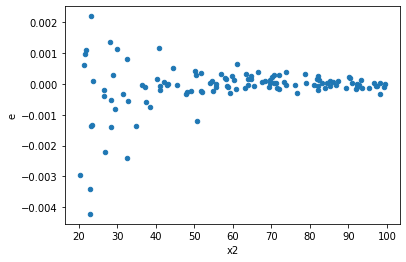

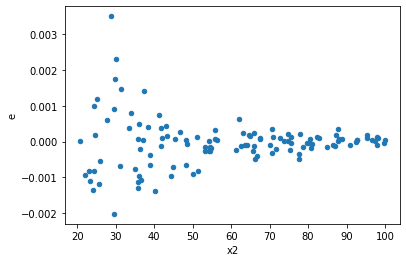

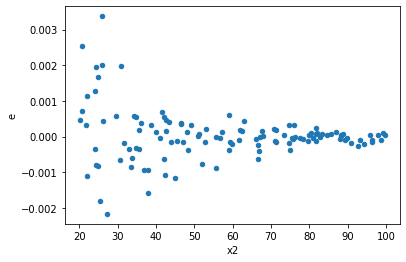

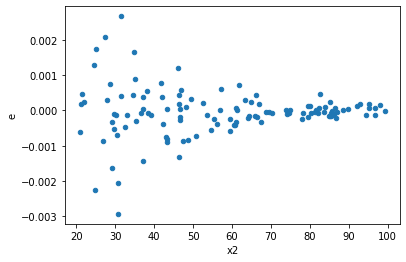

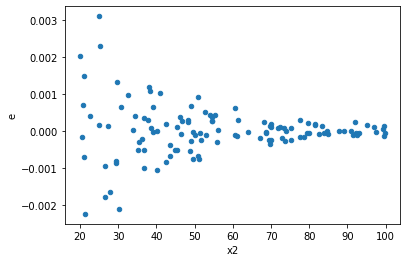

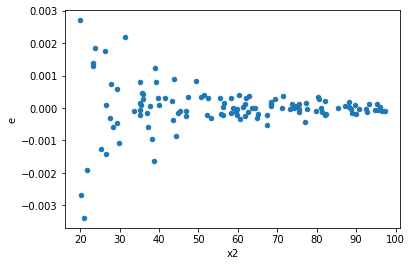

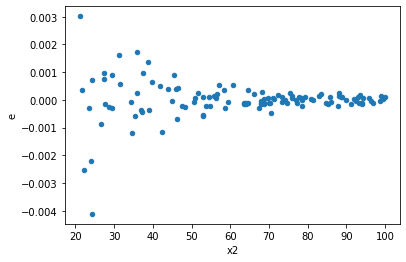

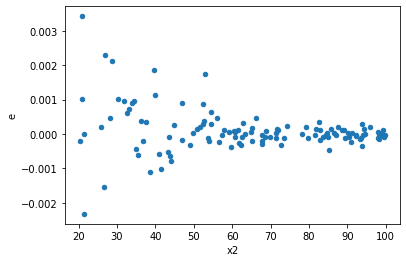

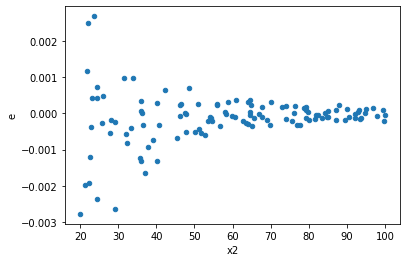

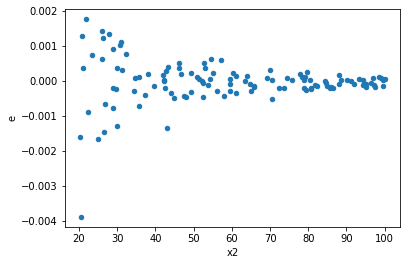

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,54.0,62.0,1.7476043231408261e-06,3.816628602494219e-05,3.236304302112641e-08,6.155852584668095e-07,19.02124154594977,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
1.0,58.0,58.0,6.494773104380319e-06,2.5173892482429822e-05,1.1197884662724689e-07,4.3403262900741073e-07,3.8760233926342402,7.080862522990117e-07,0.9999996459568739,3.5404312614950584e-07,Reject005=0 : Heteroscedasticity
2.0,46.0,70.0,1.2771637287488681e-06,6.092936555684443e-05,2.776442888584496e-08,8.704195079549205e-07,31.350167926511297,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
4.0,63.0,53.0,3.364101919863118e-06,3.611826680719331e-05,5.339844317243044e-08,6.814767322111946e-07,12.762108625725633,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
5.0,59.0,57.0,4.3525523983574155e-05,4.489279432605932e-05,7.377207454843077e-07,7.875928829133213e-07,1.0676030025375969,0.8053676829363623,0.5973161585318189,0.40268384146818115,Reject005=1 : Homoscedasticity
7.0,48.0,68.0,6.588619482490098e-07,4.4423187158722065e-05,1.3726290588521038e-08,6.532821640988539e-07,47.59349657402546,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
8.0,53.0,63.0,1.958613433070919e-06,5.3853196056702036e-05,3.695497043530036e-08,8.548126358206672e-07,23.131195228994898,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
10.0,53.0,63.0,2.0461121715662203e-05,4.402998769206682e-05,3.8605890029551326e-07,6.988886935248702e-07,1.810316231512595,0.02430762796104524,0.9878461860194774,0.01215381398052262,Reject005=0 : Heteroscedasticity
13.0,61.0,55.0,5.446978789790206e-06,5.287014685513854e-05,8.929473425885583e-08,9.612753973661552e-07,10.765196910486583,8.881784197001252e-16,0.9999999999999996,4.440892098500626e-16,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,54.0,62.0,1.7476043231408261e-06,3.816628602494219e-05,3.236304302112641e-08,6.155852584668095e-07,19.02124154594977,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
1.0,58.0,58.0,6.494773104380319e-06,2.5173892482429822e-05,1.1197884662724689e-07,4.3403262900741073e-07,3.8760233926342402,7.080862522990117e-07,Reject005=0 : Heteroscedasticity
2.0,46.0,70.0,1.2771637287488681e-06,6.092936555684443e-05,2.776442888584496e-08,8.704195079549205e-07,31.350167926511297,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
3.0,57.0,59.0,3.952444382336456e-05,1.3436210841569387e-06,6.934112951467467e-07,2.2773238714524385e-08,0.03284232442407054,1.0318217534366699e-27,Reject005=0 : Heteroscedasticity
4.0,63.0,53.0,3.364101919863118e-06,3.611826680719331e-05,5.339844317243044e-08,6.814767322111946e-07,12.762108625725633,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
5.0,59.0,57.0,4.3525523983574155e-05,4.489279432605932e-05,7.377207454843077e-07,7.875928829133213e-07,1.0676030025375969,0.8053676829363623,Reject005=1 : Homoscedasticity
6.0,62.0,54.0,7.477092875044491e-05,3.990853983068841e-05,1.2059827217813696e-06,7.390470339016372e-07,0.6128172655823653,0.06295471678498911,Reject005=1 : Homoscedasticity
7.0,48.0,68.0,6.588619482490098e-07,4.4423187158722065e-05,1.3726290588521038e-08,6.532821640988539e-07,47.59349657402546,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
8.0,53.0,63.0,1.958613433070919e-06,5.3853196056702036e-05,3.695497043530036e-08,8.548126358206672e-07,23.131195228994898,2.220446049250313e-16,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    776
Reject005=1 : Homoscedasticity      224
Name: Result_test, dtype: int64